Задание

    Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
    Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
    Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
    Проанализируйте CTR с разбивкой по рекламной кампании.
    Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
    Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
    Посчитайте конверсию из клика в покупку.
    
Описание данных

    ad_id – идентификатор объявления (рекламы)
    
    xyz_campaign_id – идентификатор рекламной кампании в базе компании X
    
    fb_campaign_id – идентификатор кампании в Facebook
    
    age – возрастная группа, которой показывалась реклама
    
    gender – пол тех, кому показывалась реклама
    
    interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
    
    impressions – число показов
    
    clicks – число кликов
    
    spent – сумма, которую компания потратила на показ объявления 
    
    total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
    
    approved_conversion – количество людей, которые купили продукт после просмотра рекламы

    1.Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

    2.Сколько уникальных рекламных кампаний было проведено? 

Note: использовать идентификатор кампании в базе Х – xyz_campaign_id

In [1]:
import pandas as pd
import datetime
import vk_api
import os
import requests
import json
import random

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
file_path = '/home/jupyter-i-petrov/Statistika/conversion.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [2]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [3]:
df.shape #число наблюдений и столбцов

(1143, 11)

In [4]:
df.isna().sum() #пропущенные значения

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [5]:
df.nunique() #число уникальных значений

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

Задание 3

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

Hint: np.log()

In [6]:
import pandas as pd
import datetime
import vk_api
import os
import requests
import json
import random

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
file_path = '/home/jupyter-i-petrov/Statistika/conversion.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [7]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [8]:
df_1 = df.groupby(['fb_campaign_id'], as_index=False) \
            .agg({'Impressions': 'sum'})

In [9]:
df_1

,fb_campaign_id,Impressions
0,103916,7350
1,103917,17861
2,103920,693
3,103928,8392
4,103929,1915
...,...,...
686,179977,1129773
687,179978,637549
688,179979,151531
689,179981,790253


In [10]:
import numpy as np

In [11]:
np.log(df_1)

,fb_campaign_id,Impressions
0,11.551338,8.902456
1,11.551348,9.790375
2,11.551377,6.541030
3,11.551454,9.035034
4,11.551463,7.557473
...,...,...
686,12.100584,13.937527
687,12.100590,13.365386
688,12.100595,11.928546
689,12.100607,13.580108


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


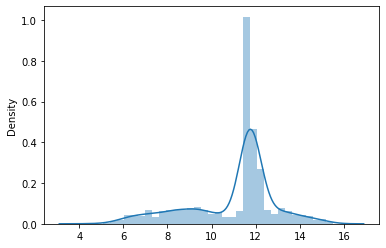

In [12]:
sns.distplot(np.log(df_1))

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


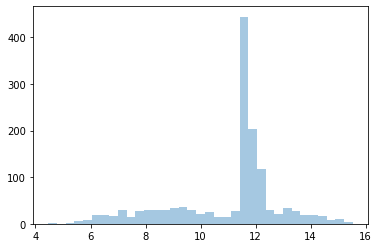

In [13]:

sns.distplot(np.log(df_1), kde = False)

In [14]:
#Полученное распределение не является нормальным,Распределение бимодальное

Задание 4

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

CTR= 
impressions
clicks
​
 

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [15]:
import pandas as pd
import datetime
import vk_api
import os
import requests
import json
import random

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
file_path = '/home/jupyter-i-petrov/Statistika/conversion.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [16]:
df['ctr'] = df.Clicks/df.Impressions

In [17]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [18]:
df.ctr.idxmax() #для поиска индекса максимального значения в Series

150

In [19]:
df.ctr.iloc[150] #для фильтрации рядов по индексу

0.001059322033898305

In [20]:
df.query("ctr==0.001059322033898305")

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


In [21]:
#738637

Задание 5

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?

In [22]:
import pandas as pd
import datetime
import vk_api
import os
import requests
import json
import random

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
file_path = '/home/jupyter-i-petrov/Statistika/conversion.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [23]:
df['CTR'] = df.Clicks/df.Impressions

In [24]:
df_1 = df.query("xyz_campaign_id == '916'")#.groupby(['ctr'], as_index=False)


In [25]:
df_1.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


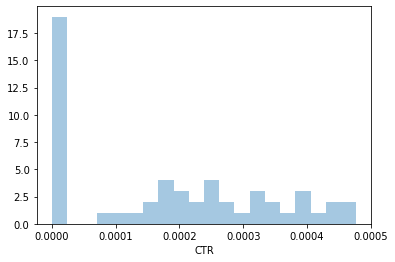

In [26]:
sns.distplot(df_1.CTR, kde = False, bins=20)
# C

Задание 6
CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы, которую компания потратила на показ объявления деленная общее число кликов:

CPC= spent/clicks
 

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna()

In [27]:
import pandas as pd
import datetime
import vk_api
import os
import requests
import json
import random

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
file_path = '/home/jupyter-i-petrov/Statistika/conversion.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [28]:
df['CTR'] = df.Clicks/df.Impressions

In [29]:
df['CPC'] = df['Spent']/df['Clicks'] # стоимость за клик пользователя по объявлению.

In [30]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [31]:
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
round(sps.iqr(df.CPC, nan_policy='omit'),2)

0.25

In [33]:
round(df.CPC.quantile(q=0.75) - df.CPC.quantile(q=0.25),2)

0.25

In [34]:
#0.25

Задание 7

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?



In [35]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [36]:
df_gender=df[['gender', 'CPC', 'CTR']].dropna()

                

In [37]:
df_gender['g']=df_gender.value_counts('gender').dropna()

In [38]:
df_gender.head()

,gender,CPC,CTR,g
0,M,1.43,0.000136,NaN
1,M,0.91,0.000112,NaN
3,M,1.25,0.000235,NaN
4,M,1.29,0.000242,NaN
6,M,1.59,0.000192,NaN


In [47]:
#sns.displot(df_gender[['CPC','CTR', 'g']], kde = True)

AttributeError: 'FacetGrid' object has no attribute 'figure'

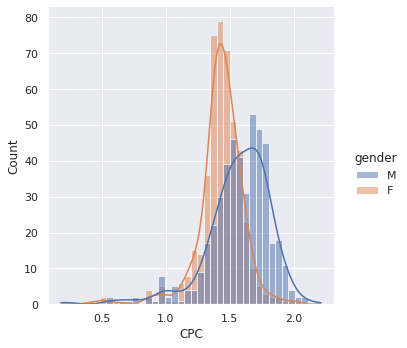

In [45]:
sns.set_theme()
g=sns.displot(data=df_gender, x='CPC', hue= 'gender', kde = True)
g.figure.set_figwidth(20)
g.figure.set_figheigth(10)

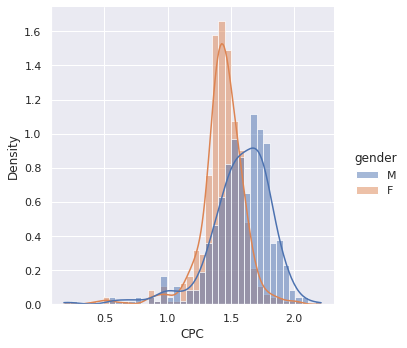

In [50]:
sns.displot(df_gender, x="CPC", hue="gender", stat="density", kde = True)

Задание 8

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.

Note: клики – Clicks, покупки – Approved_Conversion.

In [51]:
df['CR'] = df.Approved_Conversion/df.Clicks

In [53]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,1.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,1.0


In [54]:
df_cr=df.query('ad_id == 1121814')

In [55]:
df_cr

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,0.030879


In [57]:
round(df_cr.CR*100,2)

860    3.09
Name: CR, dtype: float64